# <span style="color : #20394d"> <u> Projet 4 - Réaliser une étude de santé publique avec Python</u></span>

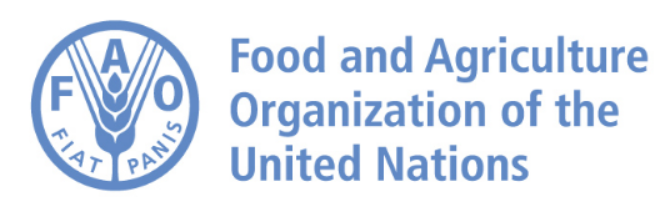

### <span style="color : #20394d"> <u> 1 - Importation des librairies</u></span>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### <span style="color : #20394d"> <u>2 - Importation des tables</u></span>

In [2]:
aide = pd.read_csv('aide_alimentaire.csv')
dispo = pd.read_csv('dispo_alimentaire.csv')
pop = pd.read_csv('population.csv')
sous_nut = pd.read_csv('sous_nutrition.csv')

In [3]:
aide.head(10)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
5,Afghanistan,2014,Céréales,15989
6,Afghanistan,2013,"Fruits secs, total",85
7,Afghanistan,2013,Huiles végétales,11087
8,Afghanistan,2014,Huiles végétales,8185
9,Afghanistan,2013,"Légumineuses Sèches,Tot.",11761


In [4]:
dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [5]:
pop.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
sous_nut.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


## <span style="color : #20394d"> <u>3 - Nettoyage des données</u></span>

### <span style="color : #486075"> <u>3.1 - Renommer les colonnes des dataframes</u></span>

In [7]:
dispo.rename(
    columns ={
        'Zone':'pays',
        'Aliments pour animaux':'aliments_animaux*1000t',
        'Autres Utilisations':'autres_utilisations*1000t',
        'Disponibilité alimentaire (Kcal/personne/jour)':'dispo_alim_(kcal/personne/jour)',
        'Disponibilité alimentaire en quantité (kg/personne/an)':'dispo_alim_quantite_(g/personne/jour)',
        'Disponibilité de matière grasse en quantité (g/personne/jour)':'dispo_mat_grasse_(g/personne/jour)',
        'Disponibilité de protéines en quantité (g/personne/jour)':'dispo_prot_(g/personne/jour)',
        'Exportations - Quantité':'export_quantite*1000t',
        'Importations - Quantité':'import_quantite*1000t',
        'Variation de stock':'variation_stock*1000t',
        'Produit':'produit',
        'Origine':'origine',
        'Disponibilité intérieure':'dispo_interieure*1000t',
        'Nourriture':'nourriture*1000t',
        'Pertes':'pertes*1000t',
        'Production':'production*1000t',
        'Semences':'semences*1000t',
        'Traitement':'traitement*1000t'
        },
    inplace=True
)
    

In [8]:
dispo.head()

,pays,produit,origine,aliments_animaux*1000t,autres_utilisations*1000t,dispo_alim_(kcal/personne/jour),dispo_alim_quantite_(g/personne/jour),dispo_mat_grasse_(g/personne/jour),dispo_prot_(g/personne/jour),dispo_interieure*1000t,export_quantite*1000t,import_quantite*1000t,nourriture*1000t,pertes*1000t,production*1000t,semences*1000t,traitement*1000t,variation_stock*1000t
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [9]:
 aide.rename(
    columns={
        'Pays bénéficiaire':'pays',
        'Année':'annee',
        'Produit':'produit',
        'Valeur':'valeur*1000t'
        },
    inplace=True
)

In [10]:
aide.head()

,pays,annee,produit,valeur*1000t
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [11]:
pop.rename(
    columns ={
        'Zone':'pays',
        'Année':'annee',
        'Valeur':'population'
        },
    inplace=True
)

In [12]:
pop.head()

,pays,annee,population
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [13]:
sous_nut.rename(
    columns ={
        'Zone':'pays',
        'Année':'annee',
        'Valeur':'population'
        },
    inplace=True
)

In [14]:
sous_nut.head()

,pays,annee,population
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


### <span style="color : #486075"> <u>3.2 - Mettre toutes les données en minuscule</u></span>

In [15]:
sous_nut['pays'] = sous_nut['pays'].str.lower()

In [16]:
pop['pays'] = pop['pays'].str.lower()

In [17]:
aide['pays'] = aide['pays'].str.lower()
aide['produit'] = aide['produit'].str.lower()

In [18]:
dispo['pays'] = dispo['pays'].str.lower()
dispo['produit'] = dispo['produit'].str.lower()

### <span style="color : #486075"> <u>3.3 - Remplacer les valeurs nulles par 0</u></span>

In [19]:
dispo.fillna(0.0, inplace=True)

In [20]:
sous_nut.fillna(0.0, inplace=True)

###  <span style="color : #486075"> <u>3.4 - Remplacer les années sous_nut et les passer en integer</u></span>

In [21]:
def annee_sousnut(annee_modif):
    if annee_modif == "2012-2014":
        return 2013
    elif annee_modif == "2013-2015":
        return 2014
    elif annee_modif == "2014-2016":
        return 2015
    elif annee_modif == "2015-2017":
        return 2016
    elif annee_modif == "2016-2018":
        return 2017
    elif annee_modif == "2017-2019":
        return 2018

In [22]:
sous_nut['annee']=sous_nut['annee'].apply(annee_sousnut)

In [23]:
sous_nut.head(10)

,pays,annee,population
0,afghanistan,2013,8.6
1,afghanistan,2014,8.8
2,afghanistan,2015,8.9
3,afghanistan,2016,9.7
4,afghanistan,2017,10.5
5,afghanistan,2018,11.1
6,afrique du sud,2013,2.2
7,afrique du sud,2014,2.5
8,afrique du sud,2015,2.8
9,afrique du sud,2016,3


In [24]:
sous_nut['annee']=sous_nut.annee.astype(int)

###### <span style="color : #6b7d8f"> vérification du changement de type de variable</span>

In [25]:
sous_nut.dtypes

pays          object
annee          int32
population    object
dtype: object

### <span style="color : #486075"> <u> 3.5 - Mettre les valeurs inférieur à 0.1 du dataframe sous_nut en nan puis les supprimer</u></span>

In [26]:
sous_nut[sous_nut== '<0.1'] = np.nan

In [27]:
sous_nut=sous_nut.dropna()

### <span style="color : #486075"> <u> 3.6 - Convertir les valeurs de la série dispo_alim en g/personne/jour</u></span>

In [84]:
# même unité, quantité et temps que les autres colonnes
dispo['dispo_alim_quantite_(g/personne/jour)']=(dispo['dispo_alim_quantite_(g/personne/jour)']*1000)/365

###  <span style="color : #486075"> <u> 3.7 - Exprimer la population de pop et sous_nut en unité et changement de type </u></span>

In [29]:
pop['population']=pop['population']*1000
sous_nut['population']=sous_nut.population.astype(float)
sous_nut['population']=sous_nut['population']*1000000
sous_nut['population']=sous_nut.population.astype(int)
sous_nut.dtypes

pays          object
annee          int32
population     int32
dtype: object

# <span style="color : #20394d"> <u> 4 - Demandes de Marc </u></span>

### <span style="color : #486075"> <u> 4.1 - Proportion de personne en état de sous nutrition pour l'année 2017</u></span>

In [30]:
ptot_sousnut = np.sum(sous_nut.loc[sous_nut['annee']==2017] ['population'])
ptot_mondiale = np.sum(pop.loc[pop['annee']==2017] ['population'])        
proportion_sousnut = round(ptot_sousnut/ptot_mondiale*100,2)
print("La proportion de personne souffrant de sous nutrition pour 2017 est de ",proportion_sousnut,"%")

La proportion de personne souffrant de sous nutrition pour 2017 est de  7.1 %


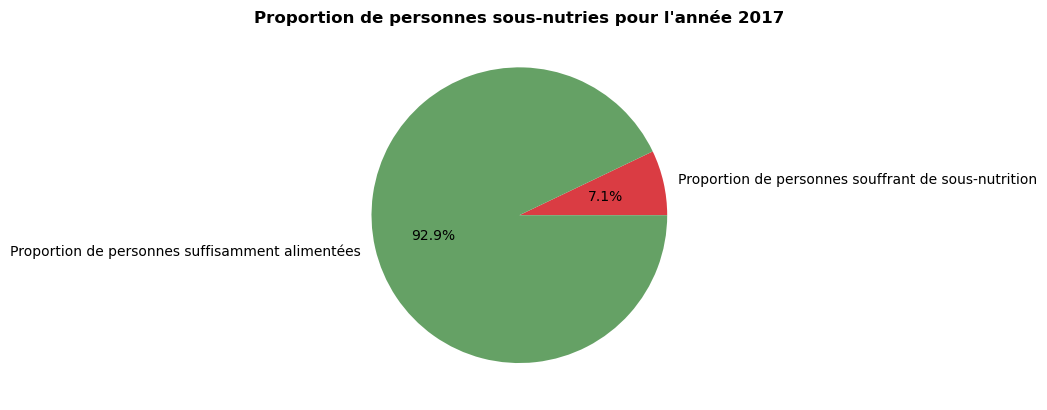

In [31]:
prop_non_sousnut = round(100-proportion_sousnut,2)

labels ='Proportion de personnes souffrant de sous-nutrition','Proportion de personnes suffisamment alimentées'
data = [proportion_sousnut,prop_non_sousnut]
colors = ['#da3c43','#65a165']
plt.pie(data,labels=labels,autopct='%.1f%%',colors=colors)
plt.title("Proportion de personnes sous-nutries pour l'année 2017",fontweight='bold')
plt.show()

### <span style="color : #486075"> <u>4.2 - Nombre théorique de personnes qui pourraient être nourries en 2017</u></span>

###### <span style="color : #6b7d8f">Calcule de l'AJR (Apport Journalier Recommandé) moyen et de l'AAR (Apport Annuel Recommandé)</span>

In [32]:
AJR_homme = 2300
AJR_femme = 2200
AJR_moyen = (AJR_homme + AJR_femme)/2
print("l'AJR moyen est de ",AJR_moyen,"calories par jour et par personne")

AAR = AJR_moyen*365
print("l'appport annuel recommandé est de ",AAR,"calories par an et par personne") 

l'AJR moyen est de  2250.0 calories par jour et par personne
l'appport annuel recommandé est de  821250.0 calories par an et par personne


###### <span style="color : #6b7d8f"> Jointure des dataframes pop et dispo</span>

In [85]:
popdispo=dispo.merge(pop.loc[pop['annee']==2017,['pays','population']],on='pays')
popdispo['population']=popdispo['population'].astype(int)
popdispo.head()

,pays,produit,origine,aliments_animaux*1000t,autres_utilisations*1000t,dispo_alim_(kcal/personne/jour),dispo_alim_quantite_(g/personne/jour),dispo_mat_grasse_(g/personne/jour),dispo_prot_(g/personne/jour),dispo_interieure*1000t,export_quantite*1000t,import_quantite*1000t,nourriture*1000t,pertes*1000t,production*1000t,semences*1000t,traitement*1000t,variation_stock*1000t,population
0,afghanistan,abats comestible,animale,0.0,0.0,5.0,12.910490,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0,36296113
1,afghanistan,"agrumes, autres",vegetale,0.0,0.0,1.0,9.682867,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0,36296113
2,afghanistan,aliments pour enfants,vegetale,0.0,0.0,1.0,0.450366,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,36296113
3,afghanistan,ananas,vegetale,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113
4,afghanistan,bananes,vegetale,0.0,0.0,4.0,20.266467,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0,36296113


###### <span style="color : #6b7d8f"> Création d'une nouvelle colonne pour calculer la disponibilité alimentaire mondiale en kcal/personne/jour sur l'année 2017</span>

In [87]:
popdispo = popdispo.assign(dispo_cal_pop_annee=dispo['dispo_alim_(kcal/personne/jour)']*popdispo['population']*365)
dispo_alim_mondiale = np.sum(popdispo['dispo_cal_pop_annee'])
print("la disponibilité alimentaire mondiale en kcal/personne/jour sur l'année 2017 est de {:,}".format(dispo_alim_mondiale))

la disponibilité alimentaire mondiale en kcal/personne/jour sur l'année 2017 est de 7,586,845,664,412,140.0


In [88]:
pop_mondiale = np.sum(pop.loc[pop['annee']==2017,'population'])
print("La population mondiale est de {:,}".format(pop_mondiale))

La population mondiale est de 7,548,134,111.0


### <span style="color : #486075"> <u> Résultats</u></span>

In [89]:
nb_tpers_nourries = round(dispo_alim_mondiale/AAR,)
print("Le nombre théorique de personnes qui pourraient être nourries est de {:,}".format(nb_tpers_nourries))

Le nombre théorique de personnes qui pourraient être nourries est de 9,238,168,237


In [37]:
proportion_persnourries=round(nb_tpers_nourries/pop_mondiale*100,2)
print("La proportion de personnes qui pourraient être nourries est de ",proportion_persnourries,"%")

La proportion de personnes qui pourraient être nourries est de  122.39 %


In [38]:
nb_pers_nourries = ptot_mondiale-ptot_sousnut
nb_pers_nourries = round(nb_pers_nourries,)
print(nb_pers_nourries)

7012434111


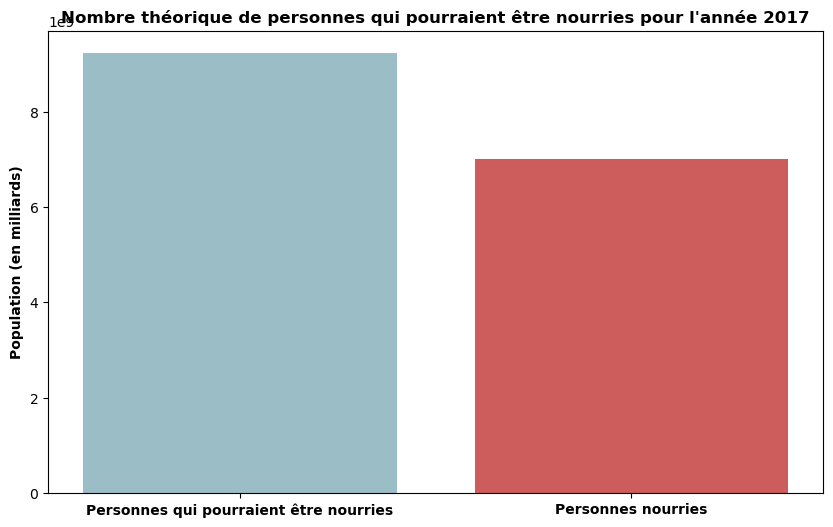

In [39]:
popnourrie = [nb_tpers_nourries,nb_pers_nourries]
bars = ['Personnes qui pourraient être nourries','Personnes nourries']
y_pos = np.arange(len(bars))

plt.figure(figsize=(10,6))
plt.bar(y_pos,popnourrie,color = ("#9bbec6","#cd5c5c"))
plt.xticks(y_pos, bars,fontweight='bold')
plt.ylabel('Population (en milliards)',fontweight='bold')
plt.title("Nombre théorique de personnes qui pourraient être nourries pour l'année 2017",fontweight='bold')
plt.show()

### <span style="color : #486075"> <u>4.3 - Nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire des produits végétaux </u></span>

In [90]:
dispo_alim_mondiale_vegetaux = popdispo.loc[popdispo['origine']=='vegetale']
dispovege = np.sum(dispo_alim_mondiale_vegetaux['dispo_cal_pop_annee'])
print("La disponibilité alimentaire mondiale pour les végétaux est de {:,}".format(dispovege),"calories par jour et par personne")

La disponibilité alimentaire mondiale pour les végétaux est de 6,247,908,094,940,675.0 calories par jour et par personne


In [91]:
nb_tpers_nourries_vegetaux = round(dispovege/AAR,)
print("Le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire végétale est de {:,}".format(nb_tpers_nourries_vegetaux))

Le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire végétale est de 7,607,802,855


In [42]:
proportion_persnourries_vegetaux = round(nb_tpers_nourries_vegetaux/pop_mondiale*100,2)
print("La proportion de personnes qui pourraient être nourries à partir de la disponibilité alimentaire végétale est de ",proportion_persnourries_vegetaux ,"%")

La proportion de personnes qui pourraient être nourries à partir de la disponibilité alimentaire végétale est de  100.79 %


### <span style="color : #486075"> <u>4.4 - Utilisation de la disponibilité intérieure : part attribuée à l'alimentation animale</u></span>

In [43]:
alim_animale_tot = np.sum(popdispo['aliments_animaux*1000t'])
print(alim_animale_tot)

dispo_inter_tot = np.sum(popdispo['dispo_interieure*1000t'])
print(dispo_inter_tot)

prop_part_animale = round(alim_animale_tot/dispo_inter_tot*100,2)
print("La part qui est attribuée  à l'alimentation animale dans la disponibilité intérieure est de ",prop_part_animale,"%")

1288002.0
9733927.0
La part qui est attribuée  à l'alimentation animale dans la disponibilité intérieure est de  13.23 %


### <span style="color : #486075"> <u>4.5 - Utilisation de la disponibilité intérieure : part perdue</u></span>

In [44]:
pertes_totales = np.sum(popdispo['pertes*1000t'])
print(pertes_totales)

prop_pertes = round(pertes_totales/dispo_inter_tot*100,2)
print("La proportion de perte dans la disponibilité alimentaire est de ",prop_pertes,"%")

452283.0
La proportion de perte dans la disponibilité alimentaire est de  4.65 %


### <span style="color : #486075"> <u>4.6 - Utilisation de la disponibilité intérieure : part utilisée pour l'alimentation humaine</u></span>

In [45]:
nourriture_totale = np.sum(popdispo['nourriture*1000t'])
print(nourriture_totale)

prop_alim_humaine = round(nourriture_totale/dispo_inter_tot*100,2)
print("La part qui est attribuée à l'alimentation humaine est de ",prop_alim_humaine,"%")

4805525.0
La part qui est attribuée à l'alimentation humaine est de  49.37 %


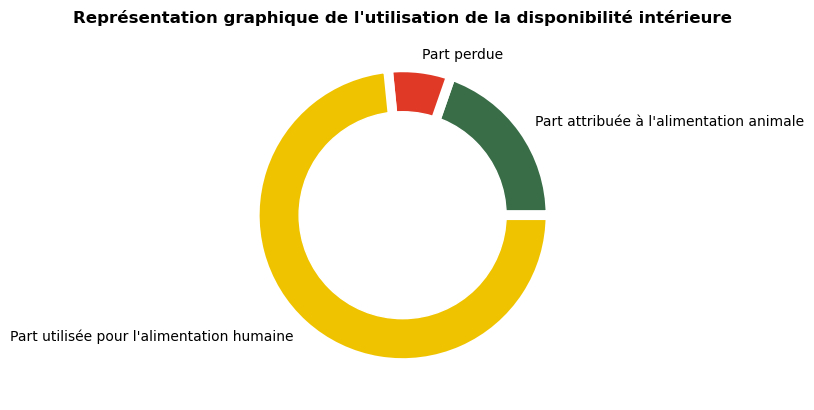

In [46]:
names = ["Part attribuée à l'alimentation animale", "Part perdue", "Part utilisée pour l'alimentation humaine"]
size = [prop_part_animale,prop_pertes,prop_alim_humaine]
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['#396d48','#e03a26','#f0c300'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Représentation graphique de l'utilisation de la disponibilité intérieure",fontweight='bold')
plt.show()

# <span style="color : #20394d"> <u>5 - Demandes de Mélanie</u></span>

###  <span style="color : #486075"> <u>5.1 - Pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017</u></span>

###### <span style="color : #6b7d8f">Jointure des dataframes sous_nut et pop</span>

In [47]:
sousnut_pop=pd.merge(pop.loc[pop['annee']==2017,['pays','population']],sous_nut.loc[sous_nut['annee']==2017,['pays','population']],on='pays')
sousnut_pop.head(10)

,pays,population_x,population_y
0,afghanistan,36296113.0,10500000
1,afrique du sud,57009756.0,3100000
2,albanie,2884169.0,100000
3,algérie,41389189.0,1300000
4,allemagne,82658409.0,0
5,andorre,77001.0,0
6,angola,29816766.0,5800000
7,antigua-et-barbuda,95426.0,0
8,arabie saoudite,33101179.0,1600000
9,argentine,43937140.0,1500000


###### <span style="color : #6b7d8f">Renommer les colonnes du nouveau dataframe</span>

In [48]:
sousnut_pop.rename(
    columns={
        'population_x':'population_totale',
        'population_y':'pop_sousnut',
        },
    inplace=True
)
sousnut_pop.columns

Index(['pays', 'population_totale', 'pop_sousnut'], dtype='object')

###### <span style="color : #6b7d8f">Création nouvelle colonne</span>

In [49]:
sousnut_pop['prop_sousnut']=round(sousnut_pop['pop_sousnut']/sousnut_pop['population_totale']*100,2)
sousnut_pop.head()

,pays,population_totale,pop_sousnut,prop_sousnut
0,afghanistan,36296113.0,10500000,28.93
1,afrique du sud,57009756.0,3100000,5.44
2,albanie,2884169.0,100000,3.47
3,algérie,41389189.0,1300000,3.14
4,allemagne,82658409.0,0,0.00


###### <span style="color : #6b7d8f">Affichage des résultats dans un ordre décroissant </span>

In [50]:
sousnut_pop.sort_values(by=['prop_sousnut'],ascending=False).head(20)

,pays,population_totale,pop_sousnut,prop_sousnut
69,haïti,10982366.0,5300000,48.26
142,république populaire démocratique de corée,25429825.0,12000000,47.19
96,madagascar,25570512.0,10500000,41.06
92,libéria,4702226.0,1800000,38.28
89,lesotho,2091534.0,800000,38.25
165,tchad,15016753.0,5700000,37.96
146,rwanda,11980961.0,4200000,35.06
108,mozambique,28649018.0,9400000,32.81
168,timor-leste,1243258.0,400000,32.17
0,afghanistan,36296113.0,10500000,28.93


###### <span style="color : #6b7d8f">Création d'un nouveau dataframe pour réaliser le graphique</span>

In [51]:
graph_sousnut=sousnut_pop.loc[sousnut_pop['prop_sousnut']>=19.83,['pays','prop_sousnut']]
graph_sousnut.head(20)

,pays,prop_sousnut
0,afghanistan,28.93
23,botswana,22.67
38,congo,27.39
40,côte d'ivoire,20.05
54,éthiopie,19.83
69,haïti,48.26
77,iraq,23.97
86,kenya,23.70
89,lesotho,38.25
92,libéria,38.28


In [52]:
graph_sousnut_copy=graph_sousnut.copy()

In [53]:
graph_sousnut_copy.replace("république populaire démocratique de corée", "corée du nord",inplace = True),
graph_sousnut_copy.replace("république-unie de tanzanie", "tanzanie",inplace = True)
graph_sousnut_copy.replace("venezuela (république bolivarienne du)", "venezuela",inplace = True)


In [54]:
graph_sousnut_copy.sort_values(by=['prop_sousnut'],ascending=False).head(20)

,pays,prop_sousnut
69,haïti,48.26
142,corée du nord,47.19
96,madagascar,41.06
92,libéria,38.28
89,lesotho,38.25
165,tchad,37.96
146,rwanda,35.06
108,mozambique,32.81
168,timor-leste,32.17
0,afghanistan,28.93


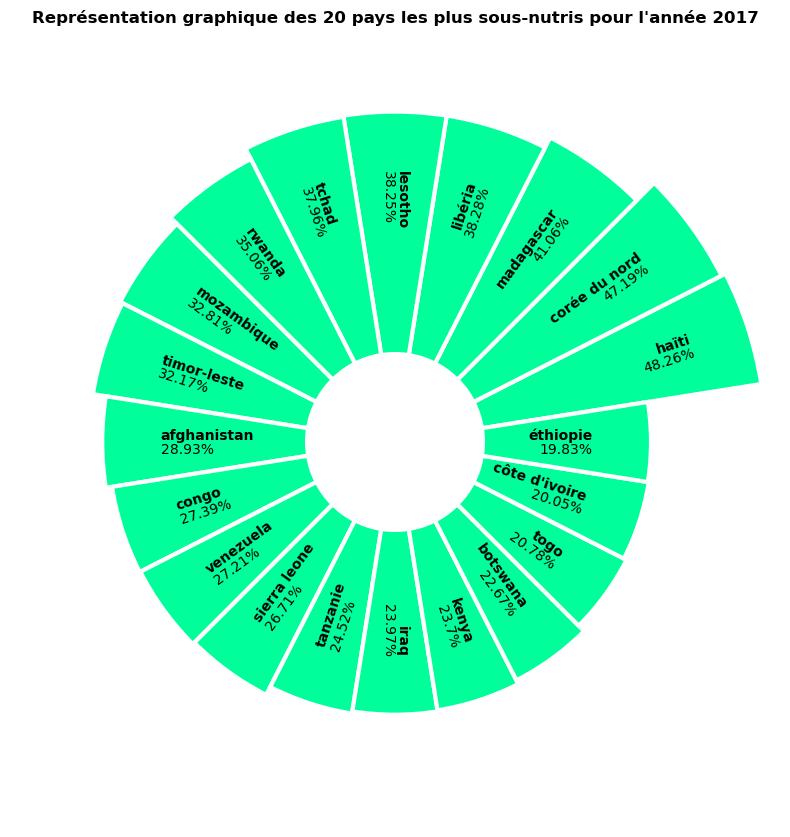

In [55]:
graph_sousnut_copy = graph_sousnut_copy.sort_values(by=['prop_sousnut'],ascending=False)

plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

upperLimit = 100
lowerLimit = 15
labelPadding = -10


max = graph_sousnut_copy['prop_sousnut'].max()

slope = (max - lowerLimit) / max
heights = slope * graph_sousnut_copy.prop_sousnut + lowerLimit


width = 2*np.pi / len(graph_sousnut_copy.index)


indexes = list(range(1, len(graph_sousnut_copy.index)+1))
angles = [element * width for element in indexes]
angles


bars = ax.bar(
    x=angles,
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=3, 
    edgecolor="white",
    color="#00ff9b",
)
for bar, angle, height, label, value in zip(bars,angles, heights,graph_sousnut_copy["pays"],graph_sousnut_copy["prop_sousnut"]):

  
    rotation = np.rad2deg(angle)

   
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "left"
        rotation = rotation + 180
    else: 
        alignment = "right"

        
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label,fontweight='bold',
        ha=alignment, 
        va='bottom', 
        rotation=rotation, 
        rotation_mode="anchor")
    
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s="{}%".format(value),
        ha=alignment, 
        va='top', 
        rotation=rotation, 
        rotation_mode="anchor")
  
    plt.title("Représentation graphique des 20 pays les plus sous-nutris pour l'année 2017",fontweight='bold')

### <span style="color : #486075"> <u>5.2 - Les pays qui ont le plus bénéficé d'aide depuis 2013</u></span>

In [56]:
aide['annee'].min()      

2013

In [57]:
aide['annee'].max()

2016

###### <span style="color : #6b7d8f">Création d'un nouveau dataframe pour obtenir les résultats </span>

In [58]:
pays_aide=aide.groupby('pays')[['valeur*1000t']].sum().copy()
print(pays_aide.sort_values(by=['valeur*1000t'],ascending=False).head(20))

                                            valeur*1000t
pays                                                    
république arabe syrienne                        1858943
éthiopie                                         1381294
yémen                                            1206484
soudan du sud                                     695248
soudan                                            669784
kenya                                             552836
bangladesh                                        348188
somalie                                           292678
république démocratique du congo                  288502
niger                                             276344
tchad                                             267966
pakistan                                          231072
république populaire démocratique de corée        187412
afghanistan                                       185452
république-unie de tanzanie                       172022
philippines                    

### <span style="color : #486075"> <u>5.3 - Pays ayant le plus/le moins de disponibilité par habitant</u></span>

###### <span style="color : #6b7d8f">Pays avec le plus de disponibilité alimentaire en kcal</span>

In [59]:
dispo_habitant_kcal=dispo[['pays','dispo_alim_(kcal/personne/jour)']].groupby('pays').sum()
print(dispo_habitant_kcal.sort_values(by=['dispo_alim_(kcal/personne/jour)'],ascending=False).head(10))

                       dispo_alim_(kcal/personne/jour)
pays                                                  
autriche                                        3770.0
belgique                                        3737.0
turquie                                         3708.0
états-unis d'amérique                           3682.0
israël                                          3610.0
irlande                                         3602.0
italie                                          3578.0
luxembourg                                      3540.0
égypte                                          3518.0
allemagne                                       3503.0


######  <span style="color : #6b7d8f">Pays avec le moins de disponibilité alimentaire en kcal</span>

In [60]:
print(dispo_habitant_kcal.sort_values(by=['dispo_alim_(kcal/personne/jour)'],ascending=True).head(10))

                                            dispo_alim_(kcal/personne/jour)
pays                                                                       
république centrafricaine                                            1879.0
zambie                                                               1924.0
madagascar                                                           2056.0
afghanistan                                                          2087.0
haïti                                                                2089.0
république populaire démocratique de corée                           2093.0
tchad                                                                2109.0
zimbabwe                                                             2113.0
ouganda                                                              2126.0
timor-leste                                                          2129.0


######  <span style="color : #6b7d8f">Pays avec le plus de disponibilité alimentaire en quantité</span>

In [61]:
dispo_habitant_quant=round(dispo[['pays','dispo_alim_quantite_(g/personne/jour)']].groupby('pays').sum(),2)
print(dispo_habitant_quant.sort_values(by=['dispo_alim_quantite_(g/personne/jour)'],ascending=False).head(10))

            dispo_alim_quantite_(g/personne/jour)
pays                                             
monténégro                                3316.19
luxembourg                                3152.49
irlande                                   3151.10
albanie                                   3001.48
finlande                                  2996.63
grèce                                     2933.97
pays-bas                                  2929.37
autriche                                  2929.32
lituanie                                  2876.90
danemark                                  2824.77


###### <span style="color : #6b7d8f">Pays avec le moins de disponibilité alimentaire en quantité</span>

In [62]:
print(dispo_habitant_quant.sort_values(by=['dispo_alim_quantite_(g/personne/jour)'],ascending=True).head(10))

               dispo_alim_quantite_(g/personne/jour)
pays                                                
tchad                                         875.21
zimbabwe                                      922.16
zambie                                        959.23
afghanistan                                   962.77
éthiopie                                      971.37
guinée-bissau                                 982.14
bangladesh                                    998.74
timor-leste                                  1011.23
yémen                                        1028.52
sénégal                                      1032.11


###### <span style="color : #6b7d8f">Pays avec le plus de disponibilité en matière grasse</span>

In [63]:
dispo_habitant_mat_grasse=round(dispo[['pays','dispo_mat_grasse_(g/personne/jour)']].groupby('pays').sum(),2)
print(dispo_habitant_mat_grasse.sort_values(by=['dispo_mat_grasse_(g/personne/jour)'],ascending=False).head(10))

                       dispo_mat_grasse_(g/personne/jour)
pays                                                     
autriche                                           170.44
belgique                                           161.95
états-unis d'amérique                              161.37
france                                             159.15
italie                                             154.69
suisse                                             153.35
israël                                             151.39
islande                                            151.35
australie                                          150.81
norvège                                            148.96


###### <span style="color : #6b7d8f">Pays avec le moins de disponibilité en matière grasse </span>

In [64]:
print(dispo_habitant_mat_grasse.sort_values(by=['dispo_mat_grasse_(g/personne/jour)'],ascending=True).head(10))

                                            dispo_mat_grasse_(g/personne/jour)
pays                                                                          
rwanda                                                                   23.77
madagascar                                                               24.49
éthiopie                                                                 25.89
bangladesh                                                               29.92
lesotho                                                                  32.26
afghanistan                                                              33.50
cambodge                                                                 35.93
république populaire démocratique de corée                               36.41
république démocratique populaire lao                                    38.86
malawi                                                                   41.17


###### <span style="color : #6b7d8f">Pays avec le plus de disponibilité en protéine</span>

In [65]:
dispo_habitant_prot=round(dispo[['pays','dispo_prot_(g/personne/jour)']].groupby('pays').sum(),2)
print(dispo_habitant_prot.sort_values(by=['dispo_prot_(g/personne/jour)'],ascending=False).head(10))

                          dispo_prot_(g/personne/jour)
pays                                                  
islande                                         133.06
chine - ras de hong-kong                        129.07
israël                                          128.00
lituanie                                        124.36
maldives                                        122.32
finlande                                        117.56
luxembourg                                      113.64
monténégro                                      111.90
pays-bas                                        111.46
albanie                                         111.37


###### <span style="color : #6b7d8f">Pays avec le moins de disponibilité en protéine</span>

In [66]:
print(dispo_habitant_prot.sort_values(by=['dispo_prot_(g/personne/jour)'],ascending=True).head(10))

                           dispo_prot_(g/personne/jour)
pays                                                   
libéria                                           37.66
guinée-bissau                                     44.05
mozambique                                        45.68
république centrafricaine                         46.04
madagascar                                        46.69
haïti                                             47.70
zimbabwe                                          48.32
congo                                             51.41
ouganda                                           52.64
sao tomé-et-principe                              53.10


# <span style="color : #20394d"> <u> 6 - DEMANDES DE JULIEN </u></span>

### <span style="color : #486075"> <u>6.1 - Utilisations de la disponibilité intérieure pour le blé de France</u></span>

###### <span style="color : #6b7d8f">Création de la série blé de France</span>

In [67]:
ble_france=dispo[(dispo['pays']=='france') & (dispo['produit']=="blé")].sum()
ble_france

pays                                         france
produit                                         blé
origine                                    vegetale
aliments_animaux*1000t                       7822.0
autres_utilisations*1000t                    2824.0
dispo_alim_(kcal/personne/jour)               811.0
dispo_alim_quantite_(g/personne/jour)    297.068493
dispo_mat_grasse_(g/personne/jour)              4.2
dispo_prot_(g/personne/jour)                  25.99
dispo_interieure*1000t                      20298.0
export_quantite*1000t                       21502.0
import_quantite*1000t                        2055.0
nourriture*1000t                             6971.0
pertes*1000t                                  358.0
production*1000t                            38614.0
semences*1000t                                748.0
traitement*1000t                             1575.0
variation_stock*1000t                        1131.0
dtype: object

###### <span style="color : #6b7d8f">Premier terme de l'équation</span>

In [68]:
dispo_inter_1=ble_france['dispo_interieure*1000t']
print(dispo_inter_1)

20298.0


###### <span style="color : #6b7d8f">Deuxième terme de l'équation</span>

In [69]:
dispo_inter_2=(int(ble_france['production*1000t']) 
               + int(ble_france['import_quantite*1000t']) 
               - int(ble_france['export_quantite*1000t'])
               + int(ble_france['variation_stock*1000t']))
print(dispo_inter_2)

20298


###### <span style="color : #6b7d8f">Troisième terme de l'équation</span>

In [70]:
dispo_inter_3=(int(ble_france['nourriture*1000t'])
               + int(ble_france['aliments_animaux*1000t'])
               + int(ble_france['semences*1000t'])
               + int(ble_france['traitement*1000t'])
               + int(ble_france['autres_utilisations*1000t'])
               + int(ble_france['pertes*1000t']))
print(dispo_inter_3)

20298


### <span style="color : #486075"> <u>6.2 - Utilisation des céréales entre l'alimentation humaine et l'alimentation pour animaux</u></span>

###### <span style="color : #6b7d8f">Liste des céréales obtenue via le site de la FAO</span>

In [71]:
liste_cereales=['avoine','blé','céréales, autres','maïs','millet','orge','riz (eq blanchi)','seigle','sorgho']

###### <span style="color : #6b7d8f">Création d'un nouveau dataframe</span>

In [72]:
cereales = dispo.loc[dispo['produit'].isin(liste_cereales),:]
cereales.head()

,pays,produit,origine,aliments_animaux*1000t,autres_utilisations*1000t,dispo_alim_(kcal/personne/jour),dispo_alim_quantite_(g/personne/jour),dispo_mat_grasse_(g/personne/jour),dispo_prot_(g/personne/jour),dispo_interieure*1000t,export_quantite*1000t,import_quantite*1000t,nourriture*1000t,pertes*1000t,production*1000t,semences*1000t,traitement*1000t,variation_stock*1000t
7,afghanistan,blé,vegetale,0.0,0.0,1369.0,438.986301,4.69,36.91,5992.0,0.0,1173.0,4895.0,775.0,5169.0,322.0,0.0,-350.0
12,afghanistan,"céréales, autres",vegetale,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,afghanistan,maïs,vegetale,200.0,0.0,21.0,6.849315,0.30,0.56,313.0,0.0,1.0,76.0,31.0,312.0,5.0,0.0,0.0
34,afghanistan,millet,vegetale,0.0,0.0,3.0,1.095890,0.02,0.08,13.0,0.0,0.0,12.0,1.0,13.0,0.0,0.0,0.0
40,afghanistan,orge,vegetale,360.0,0.0,26.0,8.000000,0.24,0.79,524.0,0.0,10.0,89.0,52.0,514.0,22.0,0.0,0.0


In [73]:
cereales_anim=cereales['aliments_animaux*1000t'].sum()
print(cereales_anim)

873535.0


In [74]:
cereales_humain=cereales['nourriture*1000t'].sum()
print(cereales_humain)

1029010.0


In [75]:
dispo_inter_cereales=cereales['dispo_interieure*1000t'].sum()
print(dispo_inter_cereales)

2406999.0


In [76]:
prop_cereales_anim=round(cereales_anim/dispo_inter_cereales*100,2)
print("La proportion de céréales utilisées pour l'alimentation animale est de ",prop_cereales_anim,"%")

La proportion de céréales utilisées pour l'alimentation animale est de  36.29 %


In [77]:
prop_cereales_humain=round(cereales_humain/dispo_inter_cereales*100,2)
print("La proportion de céréales utilisées pour l'alimentation humaine est de ",prop_cereales_humain,"%")

La proportion de céréales utilisées pour l'alimentation humaine est de  42.75 %


### <span style="color : #486075"> <u>6.3 - Utilisation du manioc en Thaïlande</u></span>

###### <span style="color : #6b7d8f">Proportion de personnes sous nutries en Thaïlande</span>

In [78]:
pop_sousnut_thai =  np.sum(sous_nut.loc[sous_nut['pays']=='thaïlande'] ['population'])
print(pop_sousnut_thai)

poptot_thai = np.sum(pop.loc[pop['pays']=='thaïlande'] ['population'])
print(poptot_thai)

prop_sousnut_tot = round(pop_sousnut_thai/poptot_thai*100,2)
print("La proportion de personnes souffrant de sous nutrition est de ",prop_sousnut_tot,"%")

36800000
412907346.0
La proportion de personnes souffrant de sous nutrition est de  8.91 %


###### <span style="color : #6b7d8f">Quantité de manioc exporté par la Thaïlande</span>

In [79]:
manioc_thai = dispo.loc[(dispo['produit']=='manioc') & (dispo['pays']=='thaïlande'),['production*1000t','export_quantite*1000t']].copy()
manioc_thai.head()

,production*1000t,export_quantite*1000t
13809,30228.0,25214.0


In [80]:
manioc_thai['prop_export_manioc']=round((manioc_thai['export_quantite*1000t']/manioc_thai['production*1000t'])*100,2)
manioc_thai

,production*1000t,export_quantite*1000t,prop_export_manioc
13809,30228.0,25214.0,83.41


In [81]:
quant_prod_manioc=manioc_thai['production*1000t']

In [82]:
quant_export_manioc=manioc_thai['export_quantite*1000t']

######  La Thaïlande est le permier exportateur mondial de manioc malgré un niveau de sous-nutrition important. Cela lui permet de gagner des devises étrangères et d'acquérir grâce à ses ventes, d'autres éléments qu'elle ne possède pas. Or, le manioc pourrait, en partie, palier au problème de sous-nutrition car il présente de nombreux avantages en le consommant cuit : très digeste et rassasiant.

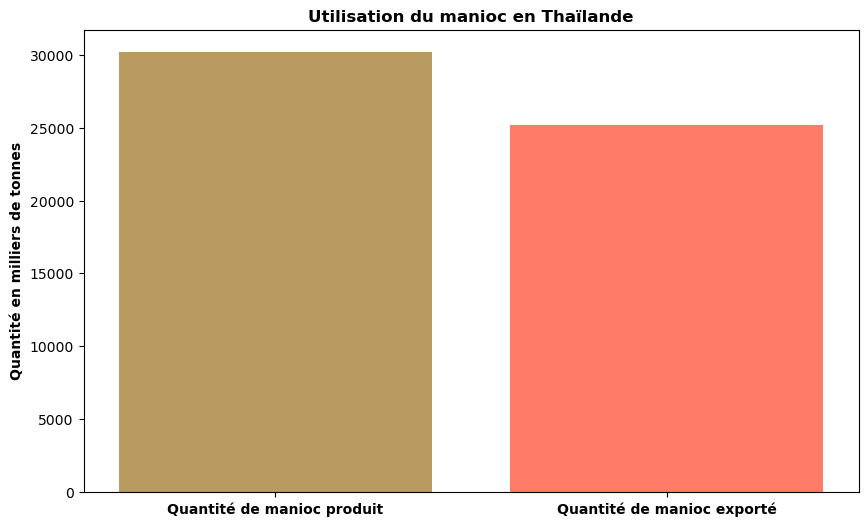

In [83]:
graphmanioc = [manioc_thai['production*1000t'].sum(),manioc_thai['export_quantite*1000t'].sum()]
bars = ['Quantité de manioc produit','Quantité de manioc exporté']
y_pos = np.arange(len(bars))

plt.figure(figsize=(10,6))
plt.bar(y_pos,graphmanioc,color = ("#b99a60","#ff7c69"))
plt.xticks(y_pos, bars,fontweight='bold')
plt.ylabel('Quantité en milliers de tonnes',fontweight='bold')
plt.title("Utilisation du manioc en Thaïlande",fontweight='bold')
plt.show()